# Analyzing Cost Functions (for Fitting Superellipsoid to Pointcloud)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x_,y_,z_,a,b,c,e1,e2):
    x = np.abs(x_)
    y = np.abs(y_)
    z = np.abs(z_)
    return ((x/a)**(2/e2) + (y/b)**(2/e2) )**(e2/e1) + (z/c)**(2/e1)

## Christopher vs. Radial Euclidian Distance

Christopher's [3] approximation looks squared. This cost will be squared again for least-squared optimization, so pretty problematic for outliers. Radial Euclidian Distance looks OK for outside of superellipsoid but its inside is a bit weird. Even though works pretty nice for fitting superellipsoid to pointcloud, especially while solving rotations (I think because the cost is relaxed on faces of superellipsoid).

/tmp/ipykernel_514801/2951892987.py:13: RuntimeWarning: divide by zero encountered in power
  cost2 = np.sqrt(ii**2+jj**2) * np.abs(1 - f_**(-e1/2))
/tmp/ipykernel_514801/2951892987.py:13: RuntimeWarning: invalid value encountered in multiply
  cost2 = np.sqrt(ii**2+jj**2) * np.abs(1 - f_**(-e1/2))


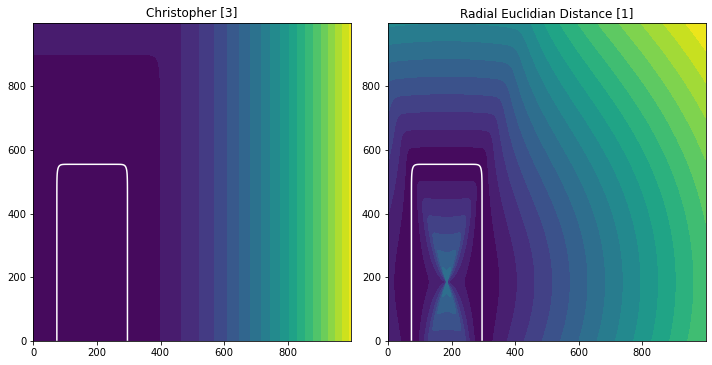

In [12]:
a = np.linspace(-0.5, 2.2, 1000)
b = np.linspace(-0.5, 2.2, 1000)
ii, jj = np.meshgrid(a, b)

a = 0.3
b = 1
c = 1
e1 = 0.1
e2 = 0.1
f_ = f(ii,jj,0.0,a,b,c,e1,e2)

cost1 = np.sqrt(a*b*c)*np.abs(f_**e1-1)
cost2 = np.sqrt(ii**2+jj**2) * np.abs(1 - f_**(-e1/2))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.contourf(cost1, levels=20)
ax1.contour(f_, levels=[1], colors="white")
ax1.set_aspect(1)
ax1.set_title("Christopher [3]")

ax2.contourf(cost2, levels=20)
ax2.contour(f_, levels=[1], colors="white")
ax2.set_aspect(1)
ax2.set_title("Radial Euclidian Distance [1]")

fig.tight_layout()

## Christopher vs. Solina

Solina looks superior to Christopher. I am thinking if Christopher did a mistake for the cost function.

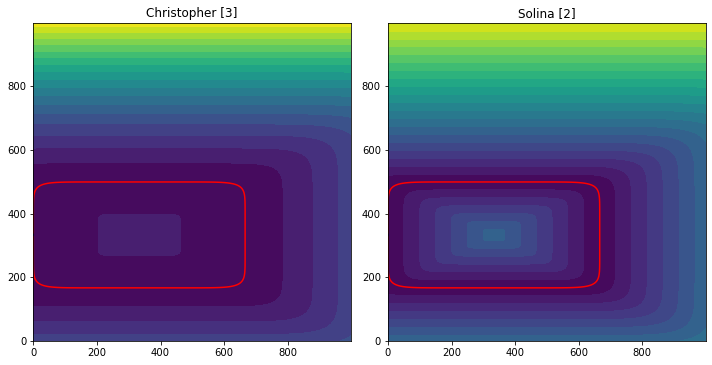

In [13]:
a = np.linspace(-1, 2, 1000)
b = np.linspace(-1, 2, 1000)
ii, jj = np.meshgrid(a, b)

a = 1
b = 1
c = 0.5
e1 = 0.2
e2 = 0.1
f_ = f(ii,0.0,jj,a,b,c,e1,e2)

cost1 = np.sqrt(a*b*c)*np.abs(f_**e1-1)
cost2 = np.abs(1 - f_**(e1/2))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.contourf(cost1, levels=20)
ax1.contour(f_, levels=[1], colors="red")
ax1.set_aspect(1)
ax1.set_title("Christopher [3]")

ax2.contourf(cost2, levels=20)
ax2.contour(f_, levels=[1], colors="red")
ax2.set_aspect(1)
ax2.set_title("Solina [2]")

fig.tight_layout()

## Solina vs Combined Method

Combined method may not be a good idea for optimization (because of computation graph building). Furthermore, Radial Euclidian Distance works pretty good enough. On the other hand, Solina's approximation [2] suffers from different scaling parameters (i.e. $a$, $b$, $c$).  

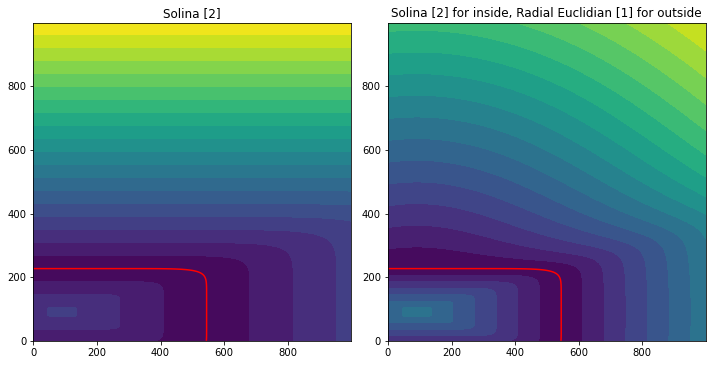

In [14]:
a = np.linspace(-0.2, 2, 1000)
b = np.linspace(-0.2, 2, 1000)
ii, jj = np.meshgrid(a, b)

a = 1
b = 1
c = 0.3
e1 = 0.2
e2 = 0.5
f_ = f(ii,0.0,jj,a,b,c,e1,e2)

cost1 = np.abs(1 - f_**(e1/2))
cost2 = np.where(f_<1, np.abs(1 - f_**(e1/2)), np.sqrt(ii**2+jj**2) * np.abs(1 - f_**(-e1/2)) )

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.contourf(cost1, levels=20)
ax1.contour(f_, levels=[1], colors="red")
ax1.set_aspect(1)
ax1.set_title("Solina [2]")

ax2.contourf(cost2, levels=20)
ax2.contour(f_, levels=[1], colors="red")
ax2.set_aspect(1)
ax2.set_title("Solina [2] for inside, Radial Euclidian [1] for outside")

fig.tight_layout()

## References

- [1] Eric BARDINET, Laurent D. COHEN, and Nicolas AYACHE. A parametric deformable model to fit unstructured 3D data. Research report 2617 - INRIA, 1995.
- [2] Franc SOLINA and Ruzena BAJCSY. Recovery of parametric models from range images: the case for superquadrics with global deformations. IEEE Transactions on Pattern Analysis and Machine Intelligence, 12(2):131–147, 1990.
- [3] Lehnert, Christopher, et al. "Sweet pepper pose detection and grasping for automated crop harvesting." 2016 IEEE international conference on robotics and automation (ICRA). IEEE, 2016.